In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as sts

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.shape

(1338, 7)

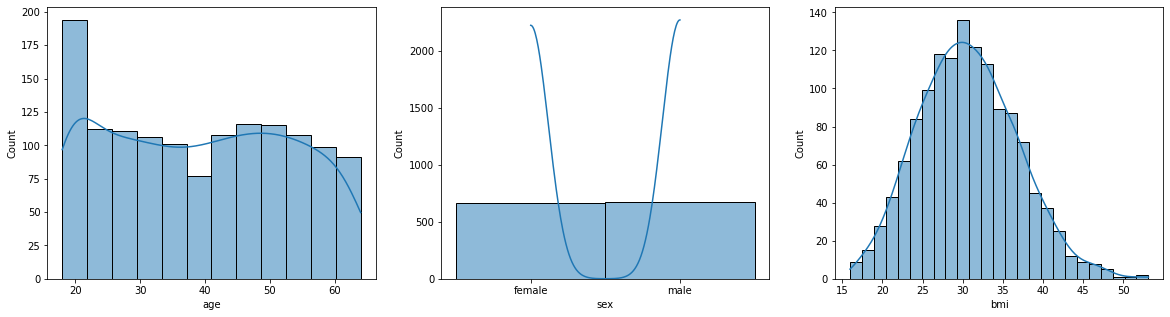

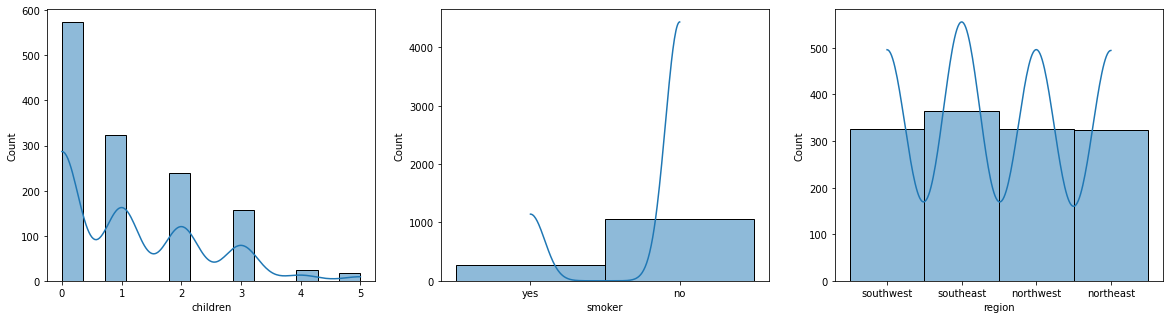

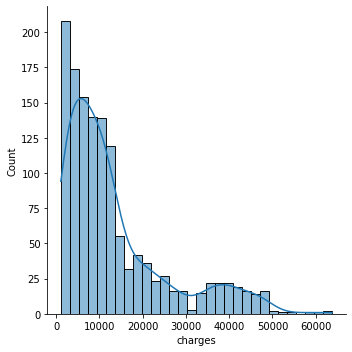

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(data.age, kde=True, ax=axs[0])
sns.histplot(data.sex, kde=True, ax=axs[1])
sns.histplot(data.bmi, kde=True, ax=axs[2])
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(data.children, kde=True, ax=axs[0])
sns.histplot(data.smoker, kde=True, ax=axs[1])
sns.histplot(data.region, kde=True, ax=axs[2])
sns.displot(data.charges, kde=True)

In [8]:
data[['smoker', 'charges']].head()

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520


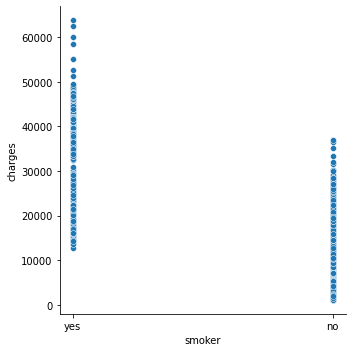

In [9]:
sns.relplot(x=data.smoker, y=data.charges)

In [10]:
# data['sex'].replace(to_replace={'female': 0, 'male': 1}, inplace=True)

In [11]:
# data.sex

In [12]:
test_data = data.copy()

In [13]:
test_data['smoker'].replace(to_replace={'yes': 1, 'no': 0}, inplace=True)

In [14]:
test_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [15]:
test_data.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


In [16]:
test_data['sex'].replace(to_replace={'male': 1, 'female': 0}, inplace=True)

In [17]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
print(np.mean(data.bmi),
sts.mode(data.bmi),
np.median(data.bmi), sep='\n')

30.66339686098655
ModeResult(mode=array([32.3]), count=array([13]))
30.4


In [19]:
print(np.mean(data.charges),
sts.mode(data.charges),
np.median(data.charges), sep='\n')

13270.422265141257
ModeResult(mode=array([1639.5631]), count=array([2]))
9382.033


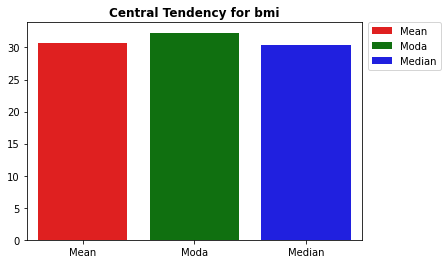

In [20]:
mean = np.mean(data.bmi)
moda = sts.mode(data.bmi)[0][0]
median = np.median(data.bmi)
array_1 = [mean, moda, median]

labels = ['Mean', 'Moda', 'Median']

sns.barplot(x=labels, y=array_1, hue=labels, palette=['r', 'g', 'b'], 
            dodge=False)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('Central Tendency for bmi', fontweight='bold')

plt.show()

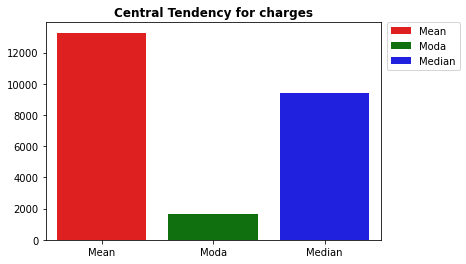

In [21]:
mean_1 = np.mean(data.charges)
moda_1 = sts.mode(data.charges)[0][0]
median_1 = np.median(data.charges)
array_2 = np.array([mean_1, moda_1, median_1])

labels = ['Mean', 'Moda', 'Median']

sns.barplot(x=labels, y=array_2, hue=labels, palette=['r', 'g', 'b'], 
            dodge=False)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('Central Tendency for charges', fontweight='bold')

plt.show()

In [22]:
pd.melt(data[['age', 'bmi', 'children', 'charges']])

,variable,value
0,age,19.0000
1,age,18.0000
2,age,28.0000
3,age,33.0000
4,age,32.0000
...,...,...
5347,charges,10600.5483
5348,charges,2205.9808
5349,charges,1629.8335
5350,charges,2007.9450


<AxesSubplot: xlabel='variable', ylabel='value'>

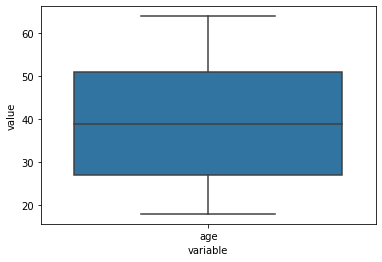

In [23]:
sns.boxplot(x='variable', y='value', data=pd.melt(data[['age']]))

<AxesSubplot: xlabel='variable', ylabel='value'>

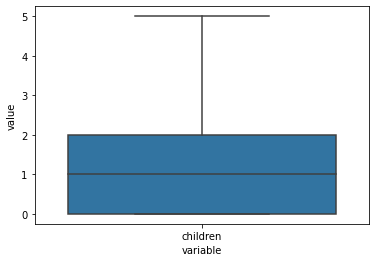

In [24]:
sns.boxplot(x='variable', y='value', data=pd.melt(data[['children']]))

<AxesSubplot: xlabel='variable', ylabel='value'>

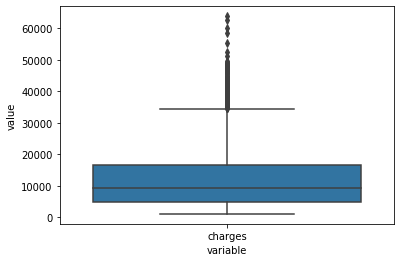

In [25]:
sns.boxplot(x='variable', y='value', data=pd.melt(data[['charges']]))

<AxesSubplot: xlabel='variable', ylabel='value'>

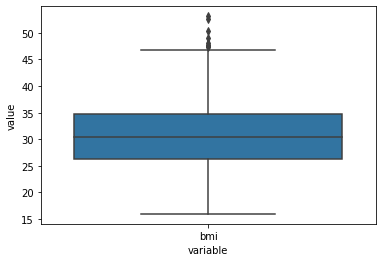

In [26]:
sns.boxplot(x='variable', y='value', data=pd.melt(data[['bmi']]))

<AxesSubplot: ylabel='children'>

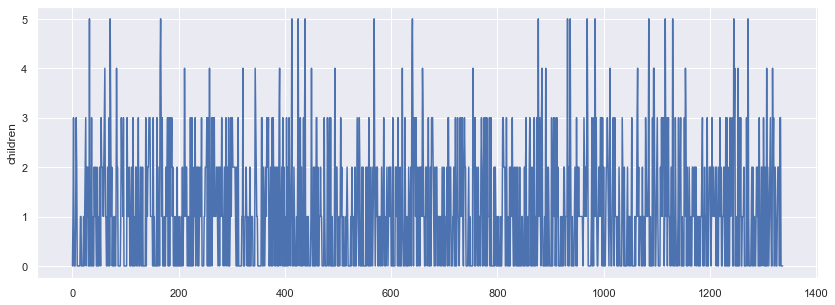

In [27]:
sns.set(rc={'figure.figsize':(14,5)})
sns.lineplot(x=[int(i) for i in range(len(data))], y='children', data=data)

In [28]:
data[['children']].info

<bound method DataFrame.info of       children
0            0
1            1
2            3
3            0
4            0
...        ...
1333         3
1334         0
1335         0
1336         0
1337         0

[1338 rows x 1 columns]>

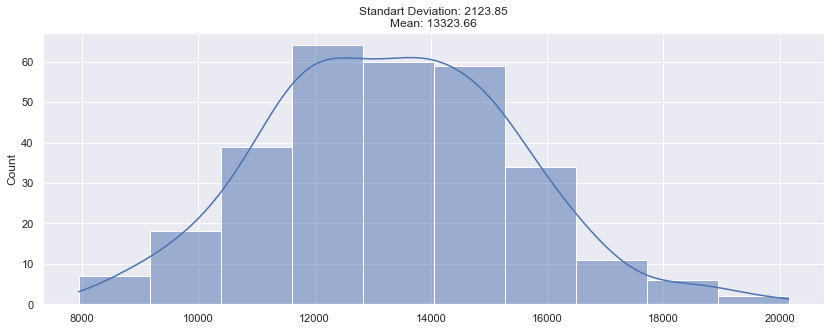

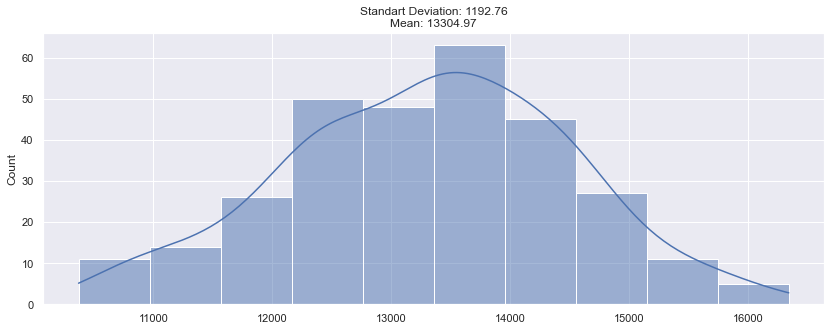

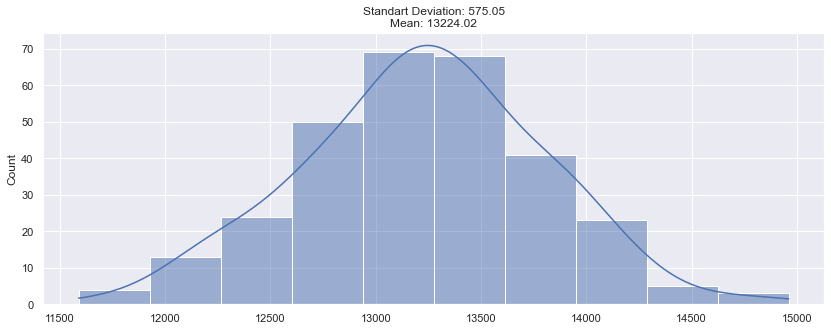

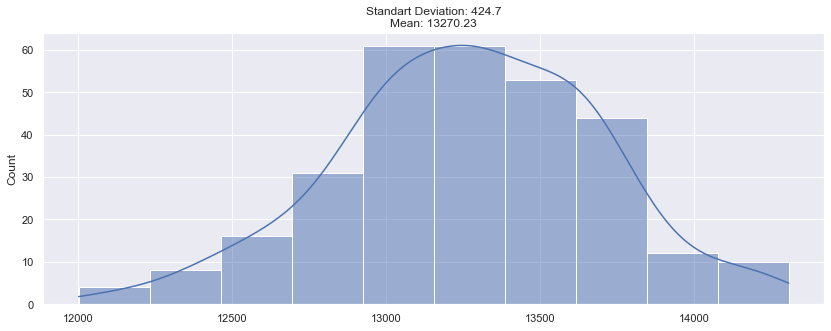

In [29]:
import numpy as np
for i in [30, 100, 300, 500]:
    sampleMeans_charges = []
    for _ in range(300):
        samples = data['charges'].sample(n=i)
        sampleMean = np.mean(samples)
        sampleMeans_charges.append(sampleMean)
    fig = sns.histplot(sampleMeans_charges, kde=True, bins=10)
    fig.set_title(f'Standart Deviation: {round(np.std(sampleMeans_charges), 2)}\n'
    f'Mean: {round(np.mean(sampleMeans_charges), 2)}')
    plt.show()

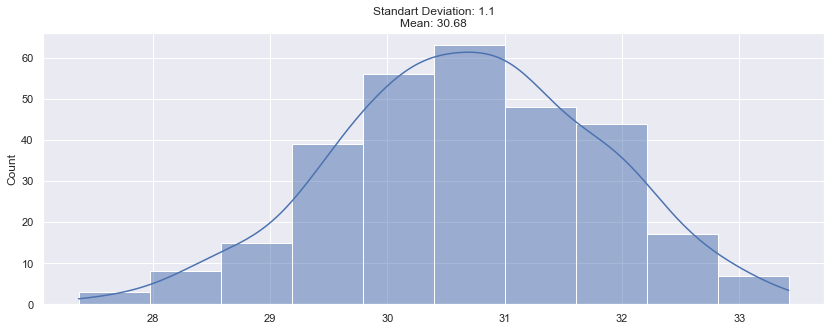

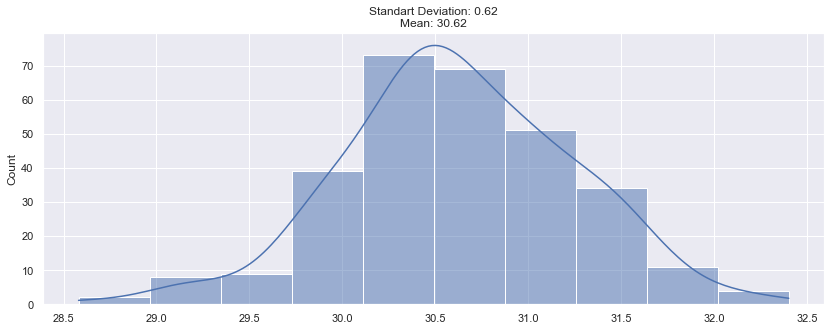

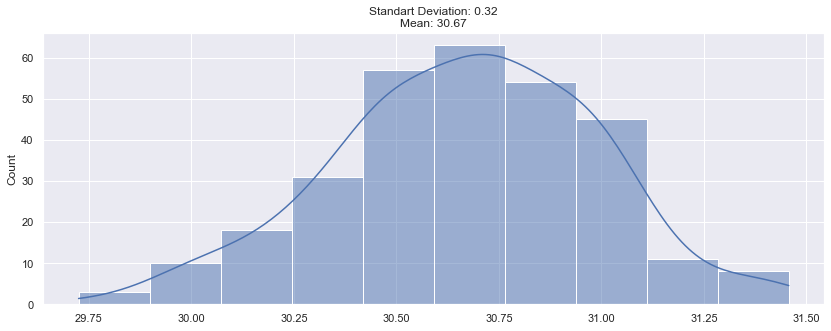

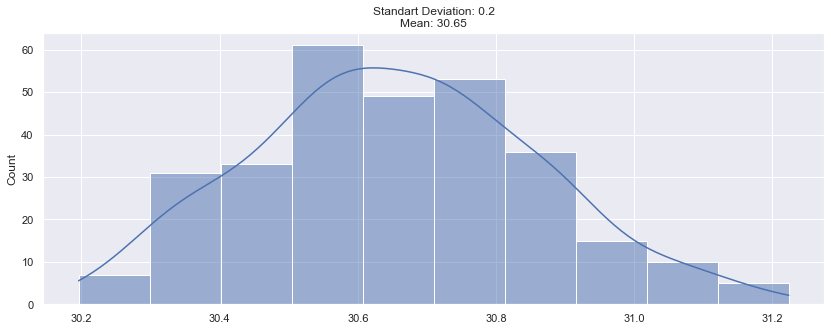

In [30]:
import numpy as np
for i in [30, 100, 300, 500]:
    sampleMeans_bmi = []
    for _ in range(300):
        samples = data['bmi'].sample(n=i)
        sampleMean = np.mean(samples)
        sampleMeans_bmi.append(sampleMean)
    fig = sns.histplot(sampleMeans_bmi, kde=True, bins=10)
    fig.set_title(f'Standart Deviation: {round(np.std(sampleMeans_bmi), 2)}\n'
    f'Mean: {round(np.mean(sampleMeans_bmi), 2)}')
    plt.show()

In [31]:
print(sts.t.interval(alpha=0.95, df=len(data.bmi)-1, 
                     loc=np.mean(data.bmi), scale=sts.sem(data.bmi)))
print(sts.t.interval(alpha=0.99, df=len(data.bmi)-1, 
                     loc=np.mean(data.bmi), scale=sts.sem(data.bmi)))

(30.336346903054107, 30.99044681891899)
(30.233355575431627, 31.09343814654147)


In [32]:
print(sts.t.interval(alpha=0.95, df=len(data.charges)-1, 
                     loc=np.mean(data.charges), scale=sts.sem(data.charges)))
print(sts.t.interval(alpha=0.99, df=len(data.charges)-1, 
                     loc=np.mean(data.charges), scale=sts.sem(data.charges)))

(12620.954034192644, 13919.890496089869)
(12416.429943203952, 14124.414587078561)


KstestResult(statistic=1.0, pvalue=0.0)


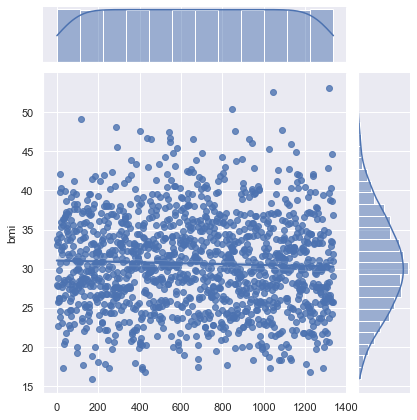

In [33]:
sns.jointplot(data=data.bmi, kind='reg', truncate=True)
print(sts.kstest(data.bmi, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)


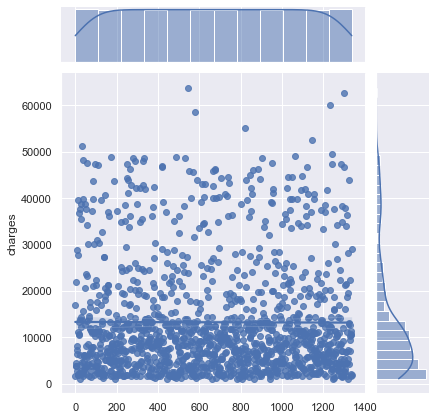

In [34]:
sns.jointplot(data=data.charges, kind='reg', truncate=True)
print(sts.kstest(data.charges, 'norm'))

KstestResult(statistic=0.02613962682509635, pvalue=0.31453976932347394)


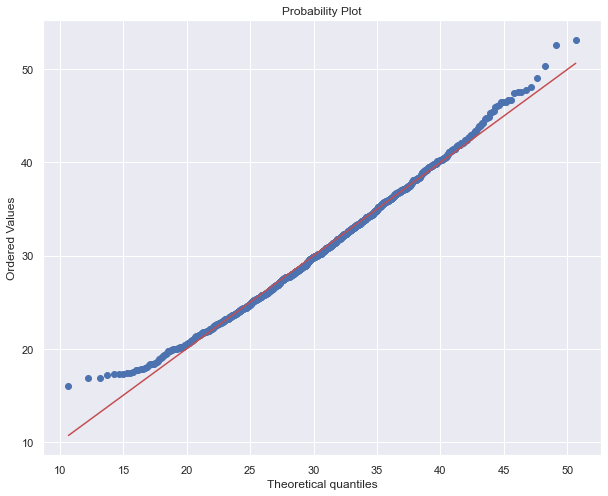

In [35]:
from scipy.stats import norm, kstest


loc, scale = norm.fit(data.bmi)

n = norm(loc=loc, scale=scale)
print(kstest(data.bmi, n.cdf))

plt.figure(figsize=(10, 8))
sts.probplot(data.bmi, dist=n, plot=plt)
plt.show()

KstestResult(statistic=0.18846204110424236, pvalue=4.39305730768502e-42)


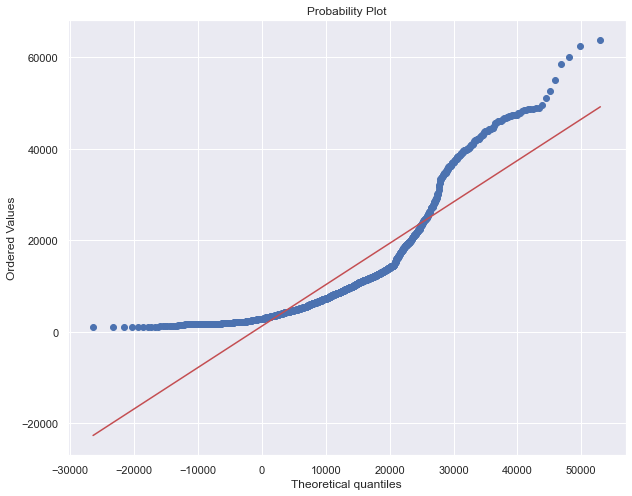

In [36]:
from scipy.stats import norm, kstest


loc, scale = norm.fit(data.charges)

n = norm(loc=loc, scale=scale)
print(kstest(data.charges, n.cdf))

plt.figure(figsize=(10, 8))
sts.probplot(data.charges, dist=n, plot=plt)
plt.show()

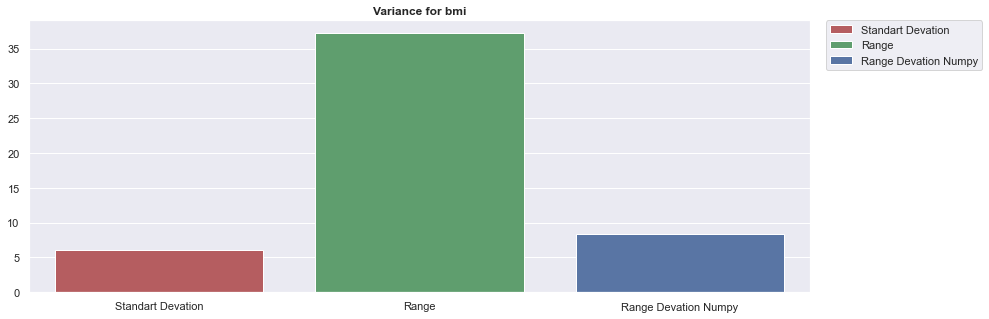

In [37]:
std_bmi = data.bmi.std()
raz_bmi = data.bmi.max() - data.bmi.min()
q1_bmi = np.percentile(data.bmi, 25, method='midpoint')
q3_bmi = np.percentile(data.bmi, 75, method='midpoint')
iqr1_bmi = q3_bmi - q1_bmi

array_3 = [std_bmi, raz_bmi, iqr1_bmi]

labels = ['Standart Devation', 'Range', 'Range Devation Numpy']

sns.barplot(x=labels, y=array_3, hue=labels, 
            palette=['r', 'g', 'b'], 
            dodge=False)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('Variance for bmi', fontweight='bold')

plt.show()

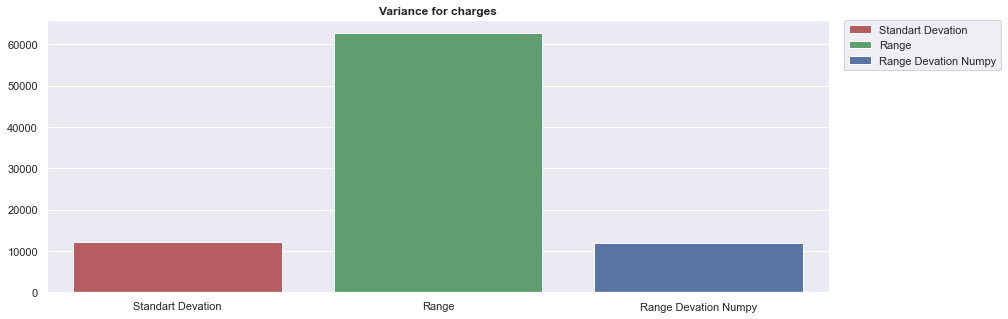

In [38]:
std_charges = data.charges.std()
raz_charges = data.charges.max() - data.charges.min()
q1_charges = np.percentile(data.charges, 25, method='midpoint')
q3_charges = np.percentile(data.charges, 75, method='midpoint')
iqr1_charges = q3_charges - q1_charges

array_3 = [std_charges, raz_charges, iqr1_charges]

labels = ['Standart Devation', 'Range', 'Range Devation Numpy']

sns.barplot(x=labels, y=array_3, hue=labels, 
            palette=['r', 'g', 'b'], 
            dodge=False)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('Variance for charges', fontweight='bold')

plt.show()

<AxesSubplot: ylabel='bmi'>

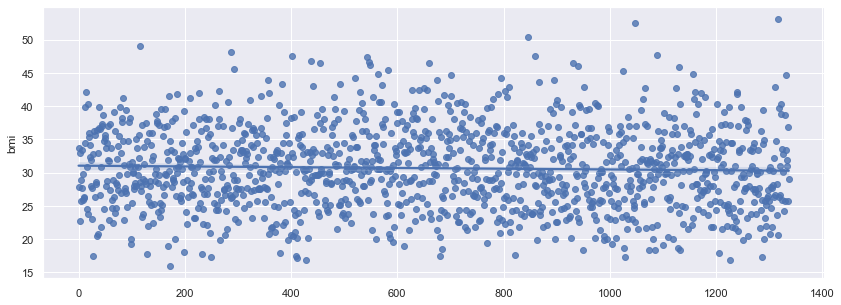

In [39]:
sns.regplot(x=list(range(len(data))), y=data.bmi, ci=95)

<AxesSubplot: ylabel='bmi'>

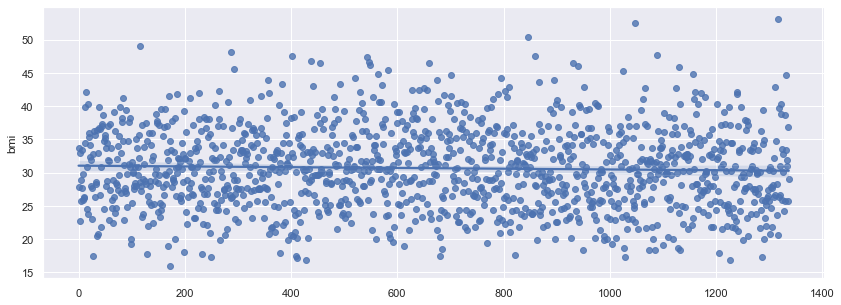

In [40]:
sns.regplot(x=list(range(len(data))), y=data.bmi, ci=99)

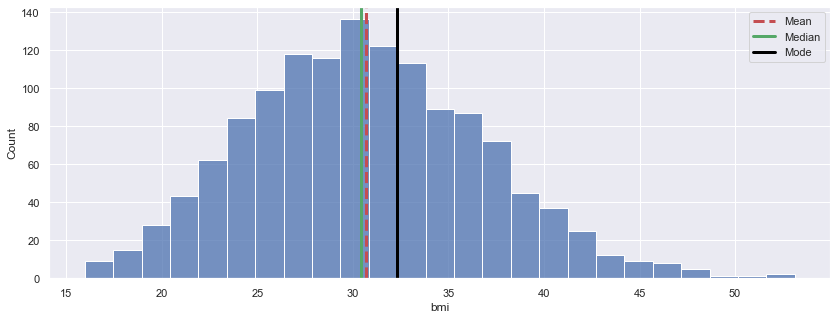

In [59]:
mean_1 = np.mean(data.bmi)
moda_1 = sts.mode(data.bmi)[0][0]
median_1 = np.median(data.bmi)

f, ax_hist = plt.subplots(sharex=True)

sns.histplot(data=data, x='bmi')

ax_hist.axvline(mean_1, color='r', linestyle='--', label="Mean", linewidth=3)
ax_hist.axvline(median_1, color='g', linestyle='-', label="Median", linewidth=3)
ax_hist.axvline(moda_1, color='black', linestyle='-', label="Mode", linewidth=3)

ax_hist.legend()

plt.show()

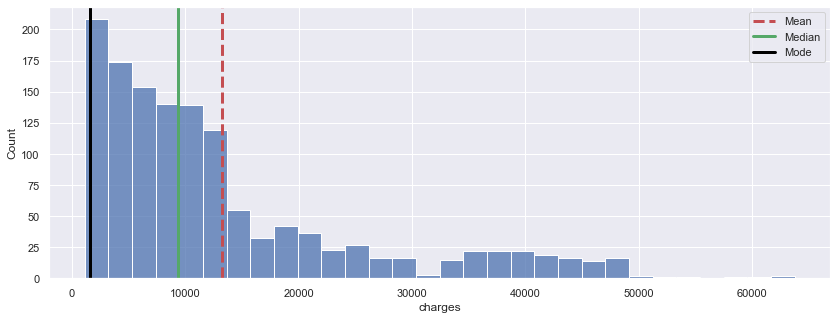

In [58]:
mean_1 = np.mean(data.charges)
moda_1 = sts.mode(data.charges)[0][0]
median_1 = np.median(data.charges)

f, ax_hist = plt.subplots(sharex=True)

sns.histplot(data=data, x='charges')

ax_hist.axvline(mean_1, color='r', linestyle='--', label="Mean", linewidth=3)
ax_hist.axvline(median_1, color='g', linestyle='-', label="Median", linewidth=3)
ax_hist.axvline(moda_1, color='black', linestyle='-', label="Mode", linewidth=3)

ax_hist.legend()

plt.show()

KstestResult(statistic=0.8625490011554073, pvalue=0.0)


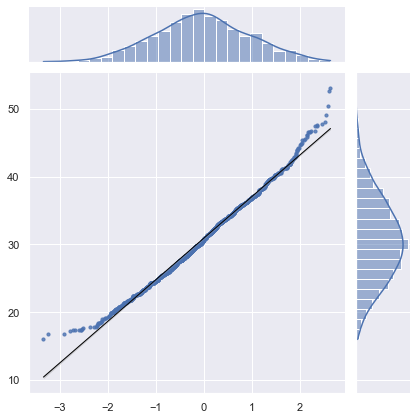

In [62]:
q2_bmi = [i for i in data.bmi]
q12_bmi_s = sts.norm.rvs(size=len(q2_bmi))
q2_bmi.sort()
q12_bmi_s.sort()

q2_charges = [i for i in data.charges]
q12_charges_s = sts.norm.rvs(size=len(q2_charges))
q2_charges.sort()
q12_charges_s.sort()

print(kstest(data.bmi, n.cdf))

sns.jointplot(x=q12_bmi_s,
             y=q2_bmi,
             kind='reg',
             truncate=True,
             color='b',
             scatter_kws={'s':10},
             line_kws={'lw':1, 'color': 'black'})

KstestResult(statistic=0.18846204110424236, pvalue=4.39305730768502e-42)


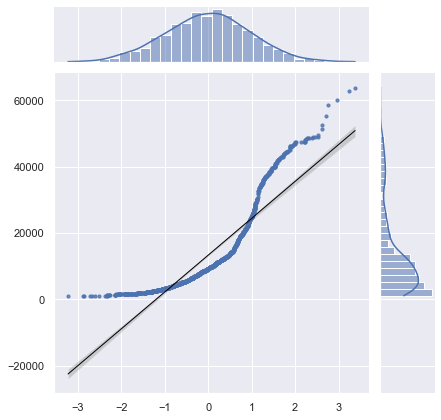

In [63]:
print(kstest(data.charges, n.cdf))

sns.jointplot(x=q12_charges_s,
             y=q2_charges,
             kind='reg',
             truncate=True,
             color='b',
             scatter_kws={'s':10},
             line_kws={'lw':1, 'color': 'black'})